In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

In [66]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [67]:
df.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [68]:
df[df['Route'].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [69]:
df[df['Total_Stops'].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [70]:
df.dropna(inplace=True)

In [71]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [72]:
df['Route'] = [x.split('→') for x in df['Route']]
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,"[BLR , DEL]",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,"[CCU , BLR]",19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,"[CCU , BLR]",20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,"[BLR , DEL]",08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,"[BLR , DEL]",11:30,14:10,2h 40m,non-stop,No info,12648


In [73]:
df['Arrival_Time'] = [x[0:5] for x in df['Arrival_Time']]
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,"[BLR , DEL]",22:20,01:10,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,"[CCU , BLR]",19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,"[CCU , BLR]",20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,"[BLR , DEL]",08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,"[BLR , DEL]",11:30,14:10,2h 40m,non-stop,No info,12648


In [74]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [75]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [76]:
df['Duration'] = df['Duration'].str.replace('m', '').str.replace('h', '')
df['Duration']

0        2 50
1        7 25
2          19
3        5 25
4        4 45
         ... 
10678    2 30
10679    2 35
10680       3
10681    2 40
10682    8 20
Name: Duration, Length: 10682, dtype: object

In [77]:
df['Duration'] = list(map(lambda x: x.split(' '), df['Duration']))
df['Duration']

0        [2, 50]
1        [7, 25]
2           [19]
3        [5, 25]
4        [4, 45]
          ...   
10678    [2, 30]
10679    [2, 35]
10680        [3]
10681    [2, 40]
10682    [8, 20]
Name: Duration, Length: 10682, dtype: object

In [78]:
df['Duration'] = list(map(lambda x: [x[0], x[1]] if len(x) == 2 else [x[0], 0], df['Duration']))
df['Duration']

0        [2, 50]
1        [7, 25]
2        [19, 0]
3        [5, 25]
4        [4, 45]
          ...   
10678    [2, 30]
10679    [2, 35]
10680     [3, 0]
10681    [2, 40]
10682    [8, 20]
Name: Duration, Length: 10682, dtype: object

In [83]:
df['Duration_Mins'] = list(map(lambda x: (int(x[0]) * 60) + int(x[1]), df['Duration']))
df['Duration_Mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_Mins, Length: 10682, dtype: int64

In [85]:
df['Total_Stops'] = [x.split(' ')[0] for x in df['Total_Stops']]
df['Total_Stops']

0        non-stop
1               2
2               2
3               1
4               1
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682           2
Name: Total_Stops, Length: 10682, dtype: object

In [86]:
df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0')
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: object

In [87]:
df['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [88]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,"[BLR , DEL]",22:20,01:10,"[2, 50]",0,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,"[7, 25]",2,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25,"[19, 0]",2,No info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,"[5, 25]",1,No info,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,"[4, 45]",1,No info,13302,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,"[CCU , BLR]",19:55,22:25,"[2, 30]",0,No info,4107,150
10679,Air India,27/04/2019,Kolkata,Banglore,"[CCU , BLR]",20:45,23:20,"[2, 35]",0,No info,4145,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,"[BLR , DEL]",08:20,11:20,"[3, 0]",0,No info,7229,180
10681,Vistara,01/03/2019,Banglore,New Delhi,"[BLR , DEL]",11:30,14:10,"[2, 40]",0,No info,12648,160


In [90]:
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib.plot'

[Text(0, 0, 'Air Asia'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'GoAir'),
 Text(3, 0, 'IndiGo'),
 Text(4, 0, 'Jet Airways'),
 Text(5, 0, 'Jet Airways Business'),
 Text(6, 0, 'Multiple carriers'),
 Text(7, 0, 'Multiple carriers Premium economy'),
 Text(8, 0, 'SpiceJet'),
 Text(9, 0, 'Trujet'),
 Text(10, 0, 'Vistara'),
 Text(11, 0, 'Vistara Premium economy')]

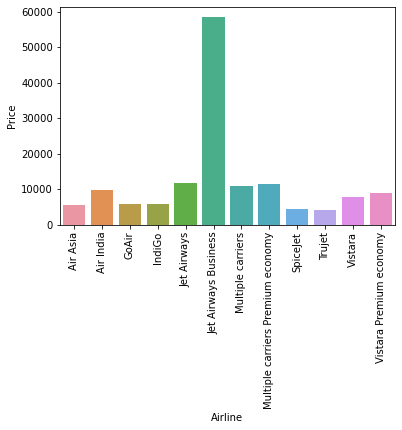

In [104]:
df_line = df[['Airline', 'Price']].groupby('Airline', as_index=False).mean()
#df_line
plt=sns.barplot(data=df_line, x='Airline', y='Price')
plt.set_xticklabels(plt.get_xticklabels(), rotation=90)

In [108]:
df[['Duration_mins','Total_Stops']]= df[['Duration_Mins','Total_Stops']].astype('float')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Mins,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,"[BLR , DEL]",22:20,01:10,"[2, 50]",0.0,No info,3897,170,170.0
1,Air India,1/05/2019,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",05:50,13:15,"[7, 25]",2.0,No info,7662,445,445.0
2,Jet Airways,9/06/2019,Delhi,Cochin,"[DEL , LKO , BOM , COK]",09:25,04:25,"[19, 0]",2.0,No info,13882,1140,1140.0
3,IndiGo,12/05/2019,Kolkata,Banglore,"[CCU , NAG , BLR]",18:05,23:30,"[5, 25]",1.0,No info,6218,325,325.0
4,IndiGo,01/03/2019,Banglore,New Delhi,"[BLR , NAG , DEL]",16:50,21:35,"[4, 45]",1.0,No info,13302,285,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,"[CCU , BLR]",19:55,22:25,"[2, 30]",0.0,No info,4107,150,150.0
10679,Air India,27/04/2019,Kolkata,Banglore,"[CCU , BLR]",20:45,23:20,"[2, 35]",0.0,No info,4145,155,155.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,"[BLR , DEL]",08:20,11:20,"[3, 0]",0.0,No info,7229,180,180.0
10681,Vistara,01/03/2019,Banglore,New Delhi,"[BLR , DEL]",11:30,14:10,"[2, 40]",0.0,No info,12648,160,160.0


<AxesSubplot:xlabel='Duration_Mins', ylabel='Price'>

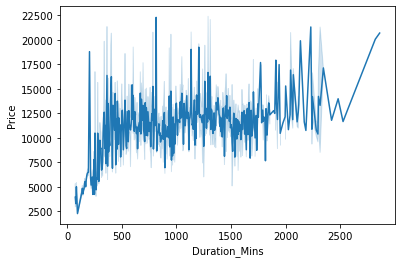

In [107]:
sns.lineplot(data=df, x='Duration_Mins', y='Price')

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

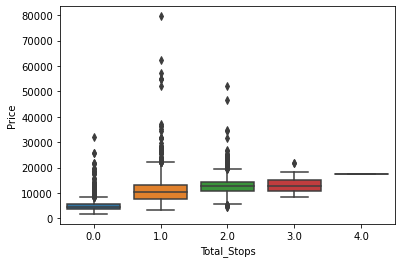

In [115]:
sns.boxplot(data=df, x='Total_Stops', y='Price')

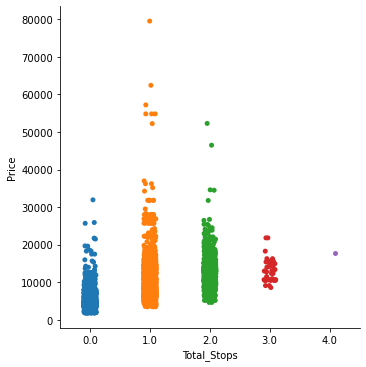

In [116]:
sns.catplot(data=df, x='Total_Stops', y='Price')

In [112]:
df_stops = df[['Total_Stops','Price']].groupby('Total_Stops', as_index=False).mean()
df_stops

,Total_Stops,Price
0,0.0,5024.900315
1,1.0,10594.123556
2,2.0,12715.807895
3,3.0,13112.000000
4,4.0,17686.000000


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

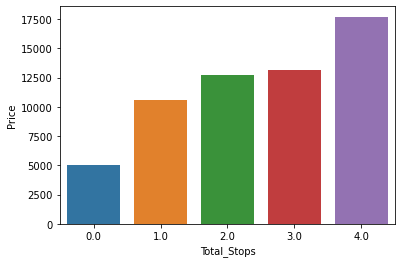

In [113]:
sns.barplot(data=df_stops, x='Total_Stops', y='Price')

In [123]:
df['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64